In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore


In [3]:
price_data=pd.read_csv('docs/BrentOilPrices.csv')


### Read loaded dataset

In [4]:
price_data.head(10)


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


### Find the information of the dataset

In [5]:
price_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


### Check missing value

In [6]:
price_data.isnull().sum()


Date     0
Price    0
dtype: int64

In [7]:
price_data['Date'] = pd.to_datetime(price_data['Date'])


In [8]:
price_data.head(10)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


### For Plot Prices Over Time Set Date into Index

In [9]:
price_data.set_index('Date',inplace=True)


In [10]:
price_data.head(10)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65


### Oil Price Over Time

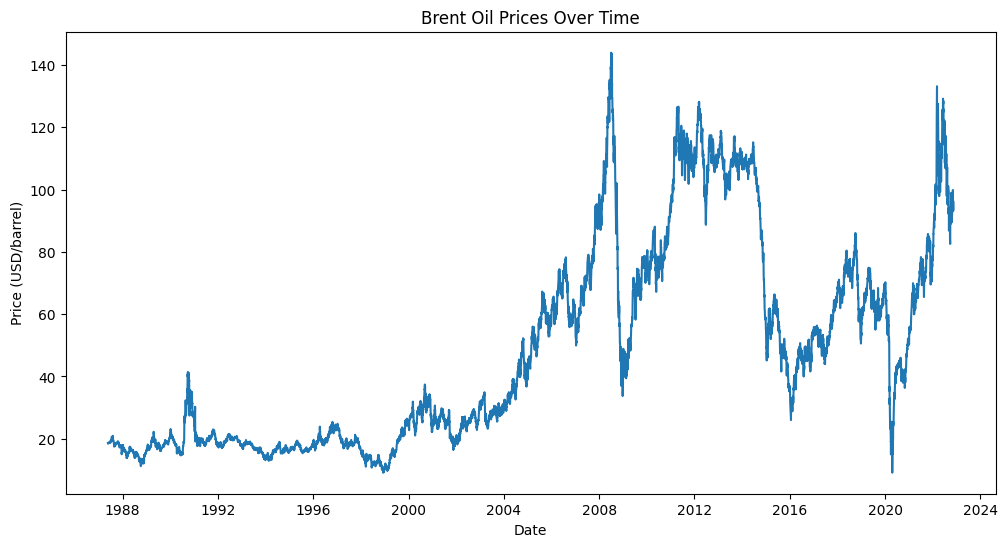

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(price_data['Price'])
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.show()


### Decompose the time series

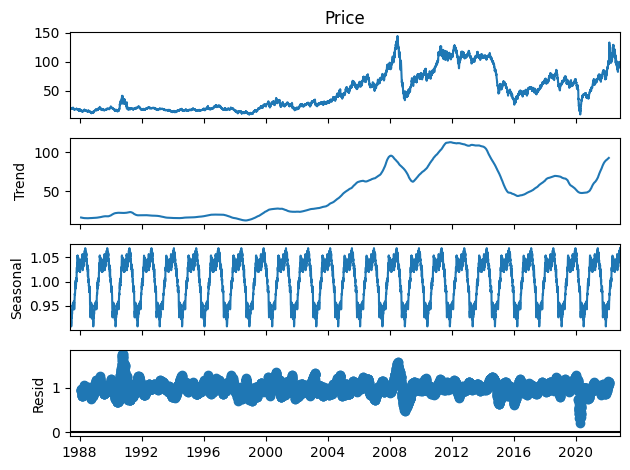

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose  # type: ignore
decomposition = seasonal_decompose(price_data['Price'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


In [13]:
price_data.reset_index()


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


### Load Sample Oil Price Events

In [14]:
event_affect_oil= pd.read_csv('docs/oil_price_events_1987_2022.csv')


In [15]:
event_affect_oil.head()
event_affect_oil['Date'] = pd.to_datetime(event_affect_oil['Date'])


### Merge Event With Price

In [16]:
merged_price_event = price_data.merge(event_affect_oil, on='Date')


In [17]:
merged_price_event.head(11)


,Date,Price,Event,Impact_on_Oil_Prices
0,1987-10-19,19.10,Black Monday stock market crash,Decline due to economic concerns
1,1990-08-02,22.25,Iraq invades Kuwait (First Gulf War),Spike due to supply fears
2,2001-09-11,29.12,9/11 Terrorist Attacks,"Initial decline, then recovery"
3,2003-03-20,28.00,Iraq War begins,Increased due to instability
4,2008-07-11,143.68,Oil reaches all-time high of $147,Record high prices
5,2010-04-20,84.73,Deepwater Horizon Oil Spill,"Brief increase, then normalization"
6,2011-01-25,96.76,Arab Spring protests,Rise due to regional instability
7,2014-06-09,110.55,Oil price downturn begins,Downturn from oversupply
8,2016-01-20,26.01,Oil price drop below $30,Further decline due to low demand
9,2018-11-02,71.11,US sanctions on Iran,Rise due to geopolitical tension


In [18]:
merged_price_event = price_data.merge(event_affect_oil, on='Date', how='left').fillna(0)


In [19]:
merged_price_event.to_csv('docs/merged_price_event.csv', index=False)



In [20]:
merged_price_event.tail(10)


,Date,Price,Event,Impact_on_Oil_Prices
9001,2022-11-01,95.12,0,0
9002,2022-11-02,96.07,0,0
9003,2022-11-03,95.29,0,0
9004,2022-11-04,99.53,0,0
9005,2022-11-07,99.87,0,0
9006,2022-11-08,96.85,0,0
9007,2022-11-09,93.05,0,0
9008,2022-11-10,94.25,0,0
9009,2022-11-11,96.37,0,0
9010,2022-11-14,93.59,0,0


### Oil Price Over Time with Significant Events

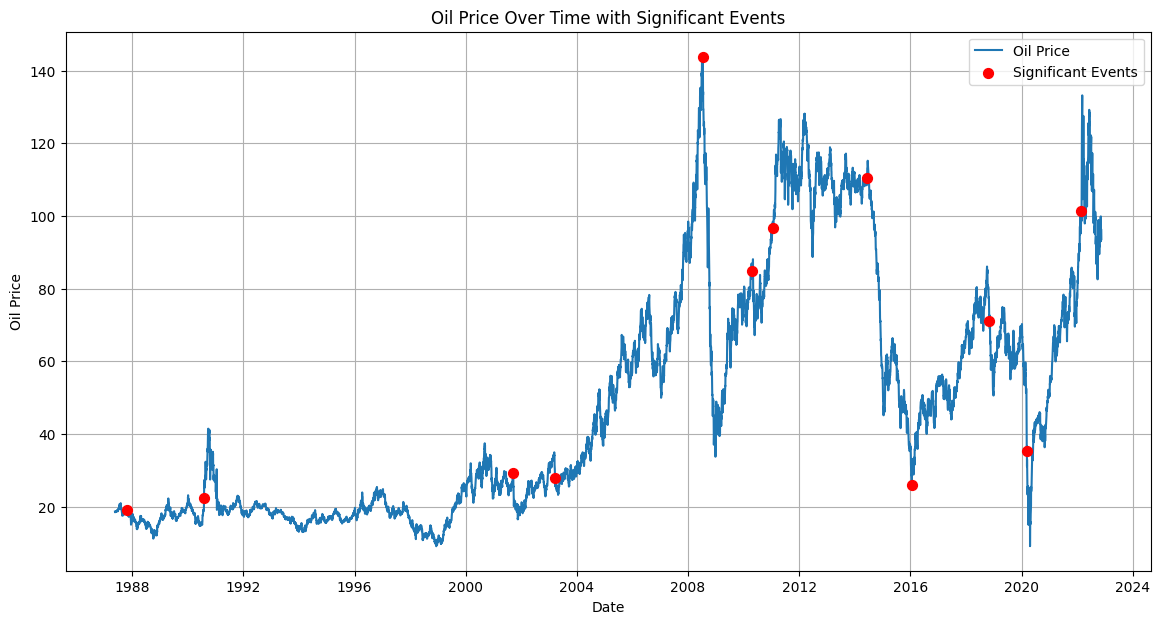

In [21]:
merged_price_event['Date'] = pd.to_datetime(merged_price_event['Date'])

merged_price_event.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_price_event, x='Date', y='Price', label='Oil Price')

event_dates = merged_price_event[merged_price_event['Event'] != 0]
plt.scatter(event_dates.index, event_dates['Price'], color='red', label='Significant Events', s=50, zorder=5)

# Customize plot
plt.title("Oil Price Over Time with Significant Events")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.legend()
plt.grid(True)
plt.show()


### Oil Price Over Time with Events Name

In [22]:
merged_price_event.reset_index(inplace=True)


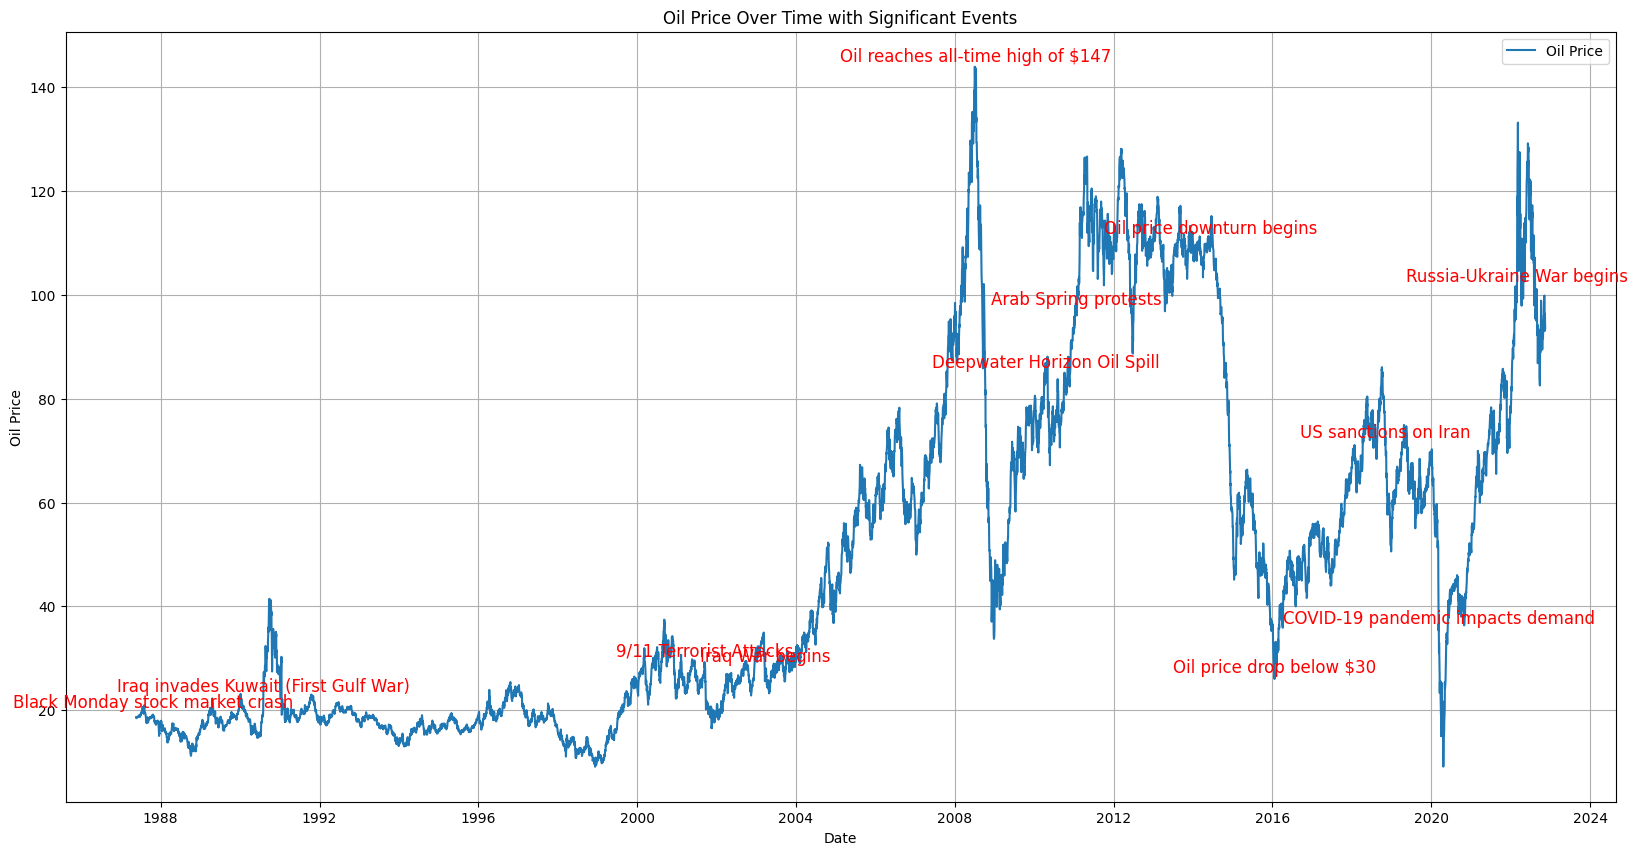

In [23]:
merged_price_event['Date'] = pd.to_datetime(merged_price_event['Date'])

merged_price_event.set_index('Date', inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=merged_price_event, x=merged_price_event.index, y='Price', label='Oil Price')

event_dates = merged_price_event[merged_price_event['Event'] != 0]
for i in range(len(event_dates)):
    plt.annotate(event_dates['Event'].iloc[i], 
                 (event_dates.index[i], event_dates['Price'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=12, 
                 color='red')

# Customize plot
plt.title("Oil Price Over Time with Significant Events")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.legend()
plt.grid(True)
plt.show()


## Advanced Analysis and Modelling of Brent Oil Prices

###  Implementing Change Point Detection Using Bayesian Models

In [24]:
import pymc as pm
prices = price_data['Price'].values
n = len(prices)

with pm.Model() as model:

    change_point = pm.DiscreteUniform("change_point", lower=0, upper=n)

    mean1 = pm.Normal("mean1", mu=np.mean(prices[:n//2]), sigma=np.std(prices[:n//2]))
    mean2 = pm.Normal("mean2", mu=np.mean(prices[n//2:]), sigma=np.std(prices[n//2:]))
    sigma = pm.HalfNormal("sigma", sigma=10)

    idx = np.arange(n)
    mean = pm.math.switch(idx < change_point, mean1, mean2)
    obs = pm.Normal("obs", mu=mean, sigma=sigma, observed=prices)

    trace = pm.sample(1000, tune=1000, target_accept=0.9)


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mean1, mean2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


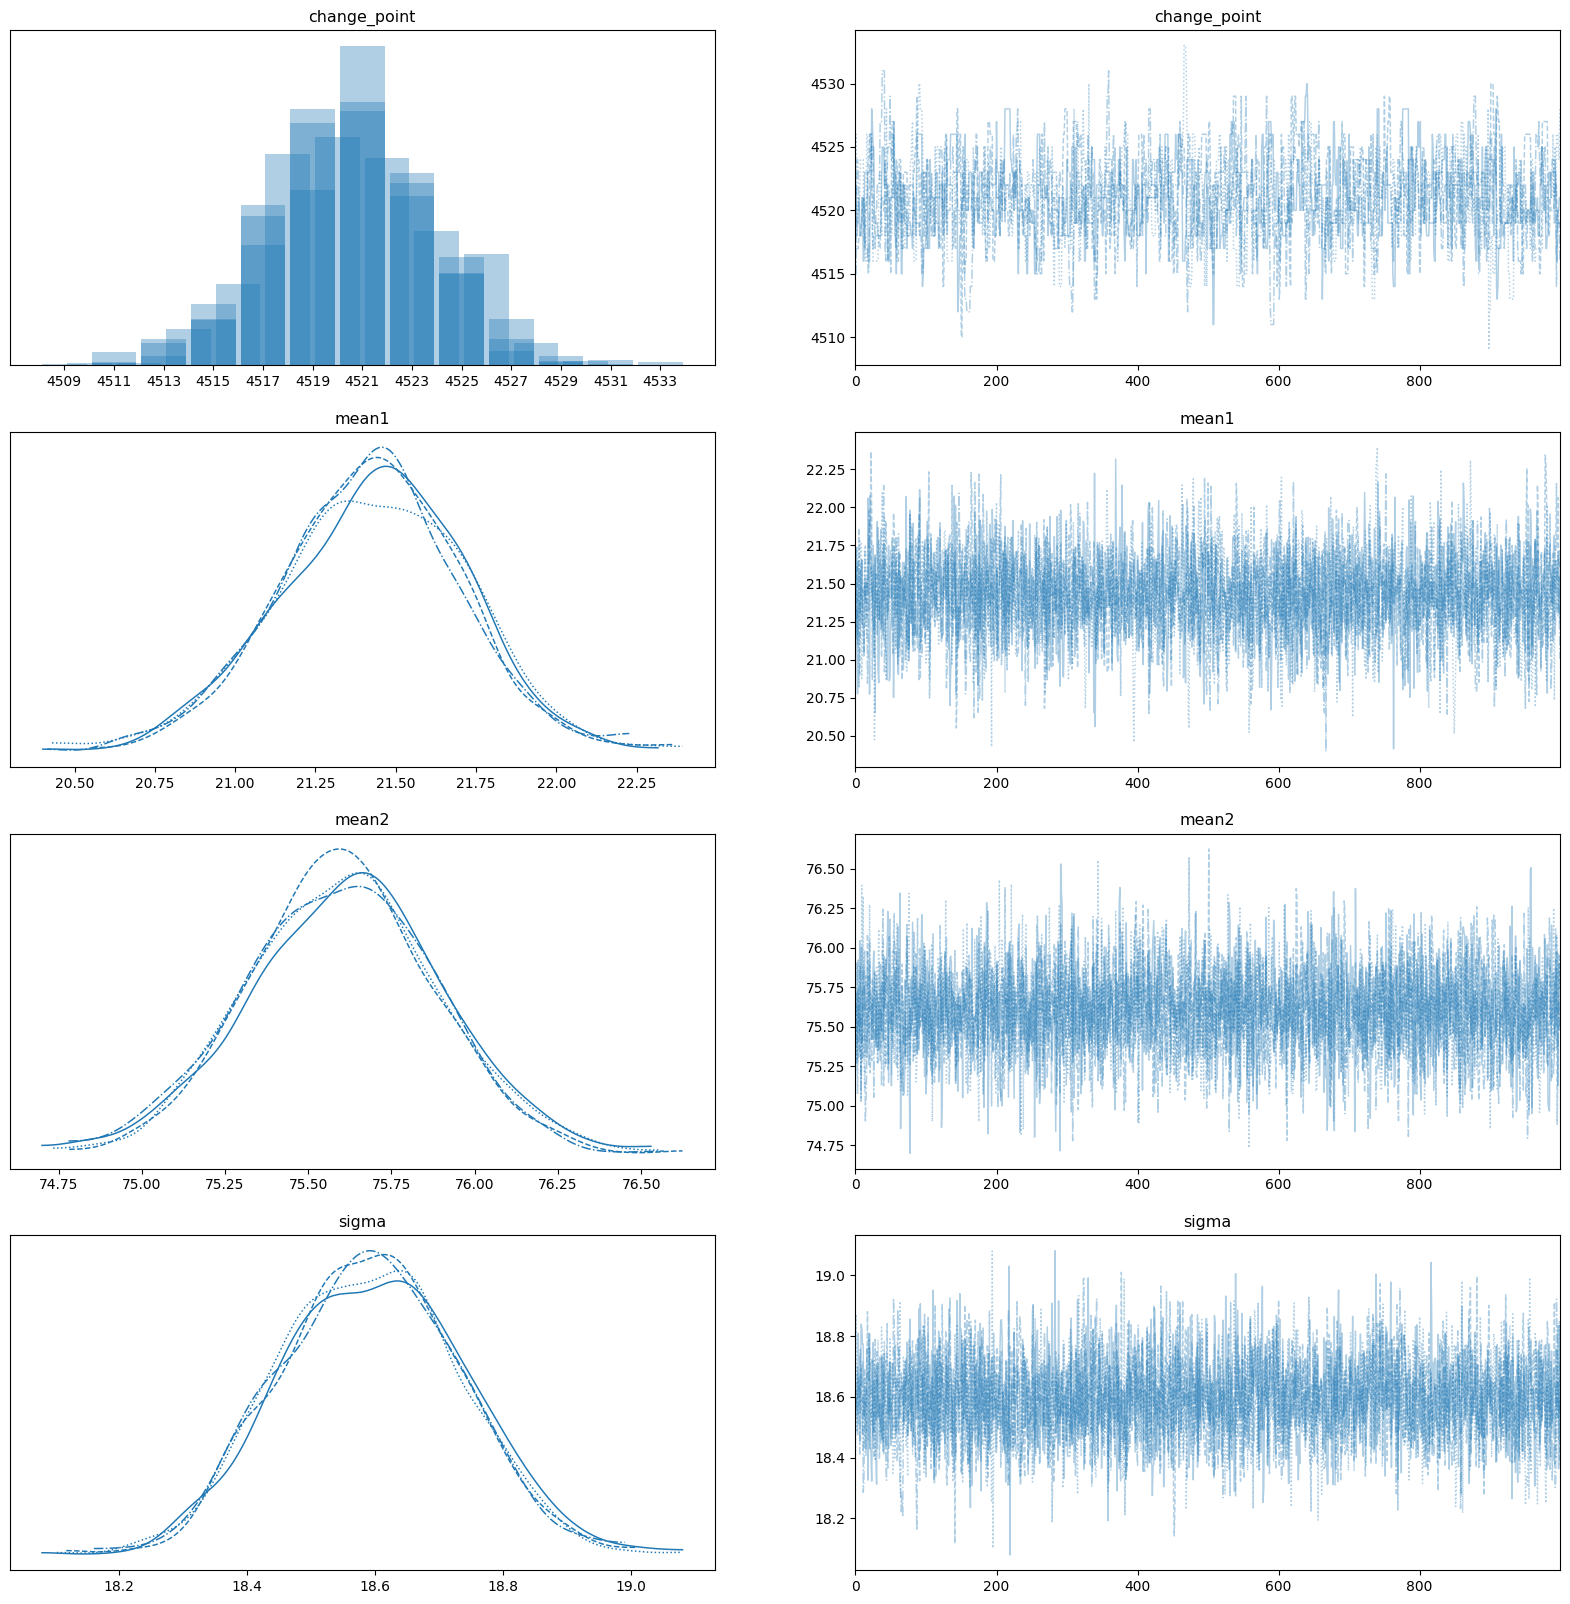

In [25]:
pm.plot_trace(trace,figsize=(20,20))
plt.show()


### Applying Time Series Analysis to Brent Oil Prices


To detect patterns, trends, and seasonality within Brent oil price data.

#### The parameters 
##### p, d, and 𝑞 in an ARIMA model represent the following:
##### p: The number of autoregressive (AR) terms. This parameter captures how past values affect the current value.
##### d: The order of differencing required to make the time series stationary (removing trends).
##### q: The number of moving average (MA) terms. This parameter accounts for past forecast errors.

In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis (the series is stationary)")
    else:
        print("Fail to reject the null hypothesis (the series is non-stationary)")

# Perform ADF test
adf_test(price_data['Price'])



ADF Statistic: -1.993856
p-value: 0.289274
Fail to reject the null hypothesis (the series is non-stationary)


Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:
Use ACF and PACF plots to determine suitable values for 
p and q.
ACF plot: Shows how correlated a time series is with its lagged values. Helps in identifying the MA (q) order.
PACF plot: Shows the partial correlation of a time series with its lagged values. Helps in identifying the AR (p) order.

<Figure size 1200x600 with 0 Axes>

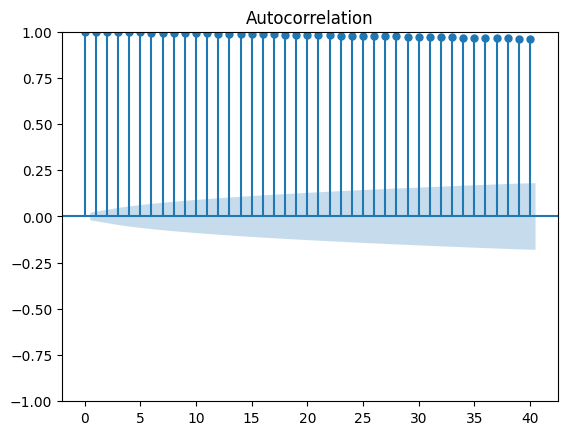

<Figure size 1200x600 with 0 Axes>

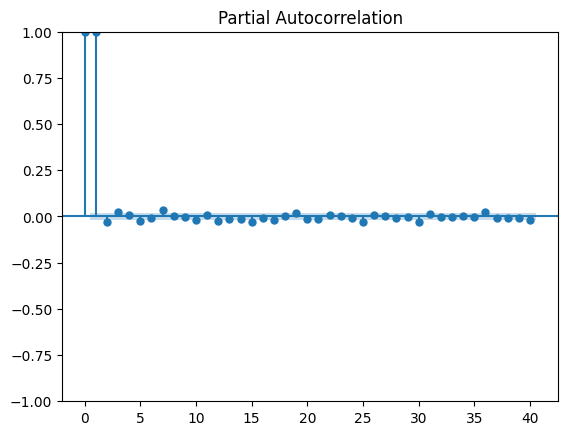

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(price_data['Price'], lags=40)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(price_data['Price'], lags=40)
plt.show()


##### p=1 (based on PACF plot),
##### d=1 (data was non-stationary),
##### q=1 (based on ACF plot),

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

train_size = int(len(price_data) * 0.8)
train, test = price_data[:train_size], price_data[train_size:]


# order(p,d,q)
arima_model = ARIMA(price_data['Price'], order=(1, 1, 1)) 
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecasting
# 365-day forecast
arima_forecast = arima_result.forecast(steps=len(test))


Importing plotly failed. Interactive plots will not work.
2024-11-02 18:38:29.473767: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 18:38:29.479151: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 18:38:29.495339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730561909.522013    7724 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730561909.529580    7724 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 18:38:29.557819: I tensorflow/core/platform/cpu_feature_guard.cc:210] Th

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Sat, 02 Nov 2024   AIC                          29093.899
Time:                        18:38:32   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

/home/osho/Projects/10AcadameyDADSML/10AcademyWeek10Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
# Calculate ARIMA metrics
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_r2 = r2_score(test, arima_forecast)


In [30]:
print(arima_rmse, arima_mae, arima_r2)


36.99296004571927 33.41574571777544 -2.214186533295874


In [31]:
### 2. Prophet Model ###
print("Building Prophet model...")
prophet_data = price_data.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
train_prophet, test_prophet = prophet_data[:train_size], prophet_data[train_size:]

prophet_model = Prophet()
prophet_model.fit(train_prophet)
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)['yhat'].iloc[-len(test):].values

# Calculate Prophet metrics
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast))
prophet_mae = mean_absolute_error(test, prophet_forecast)
prophet_r2 = r2_score(test, prophet_forecast)


Building Prophet model...


18:38:33 - cmdstanpy - INFO - Chain [1] start processing
18:38:39 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
print(prophet_rmse,prophet_mae,prophet_r2)


31.864494208302443 28.31155268820136 -1.3847725757885696


/home/osho/Projects/10AcadameyDADSML/10AcademyWeek10Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


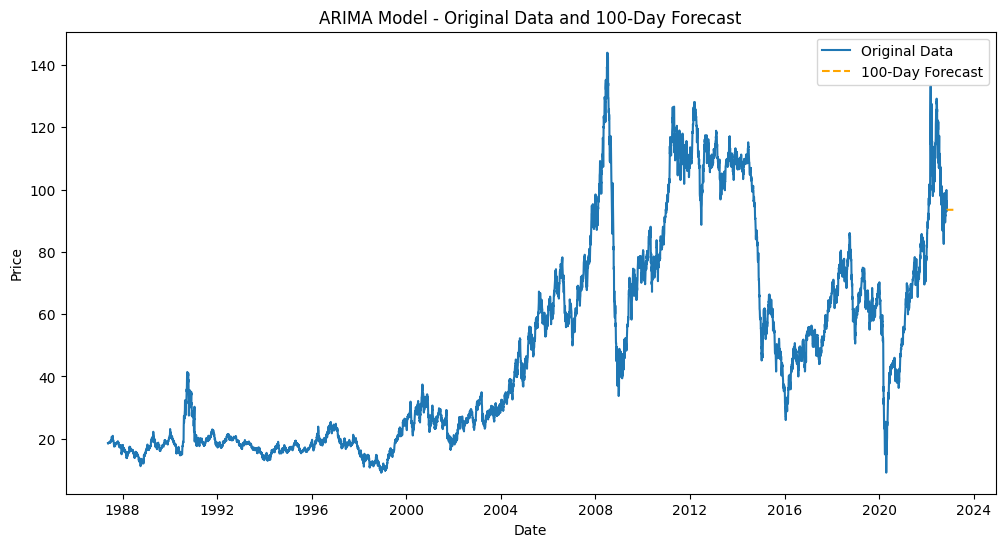

In [33]:

arima_fitted = arima_model.fit()

# Generate ARIMA forecast for the next 'forecast_steps' days
forecast_steps = 100
arima_forecast = arima_fitted.predict(start=len(price_data), end=len(price_data) + forecast_steps - 1)

# Create forecast dates for plotting
forecast_dates = pd.date_range(start=price_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Plotting the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['Price'], label='Original Data')
plt.plot(forecast_dates, arima_forecast, label=f'{forecast_steps}-Day Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'ARIMA Model - Original Data and {forecast_steps}-Day Forecast')
plt.legend()
plt.show()


Incorporating Machine Learning Models for Deeper Analysis
Objective: Use machine learning models to capture non-linear patterns and dependencies in Brent oil prices.

Methods:

Long Short-Term Memory (LSTM) Networks: Leverage LSTM for time-series forecasting.
Steps:
Data Preparation: Scale the data and structure it for LSTM input.
Model Training: Use a sequential model with LSTM layers.
Evaluation: Use out-of-sample testing and metrics like RMSE

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from sklearn.preprocessing import MinMaxScaler

# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(price_data.values)

# Creating LSTM dataset
def create_lstm_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Choose a suitable time step for LSTM
X, Y = create_lstm_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size - time_step:]

# Prepare test dataset for predictions
X_test, Y_test = create_lstm_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building LSTM lstm_model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the lstm_model
lstm_model.fit(X, Y, epochs=20, batch_size=64, verbose=1)




Epoch 1/20


2024-11-02 18:38:43.100025: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0128
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 4.7529e-04
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 3.8979e-04
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 3.3776e-04
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.7317e-04
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 3.1349e-04
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 2.8840e-04
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 2.5519e-04
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 2.1431e-04
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 2.0142e-04
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 1.9822e-04
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 1.7816e-04
Epoch 13/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 1.6193e-04
Epoch 14/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 1.6491e-04


In [35]:
# Make LSTM predictions and inverse scale
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)
y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate LSTM metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_forecast))
lstm_mae = mean_absolute_error(y_test, lstm_forecast)
lstm_r2 = r2_score(y_test, lstm_forecast)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [36]:
print(lstm_rmse,lstm_mae, lstm_r2)


2.1746159743480318 1.6403830931745016 0.9888854089526619


### Model Evaluation Summary

Comparative Model Evaluation
Insight: By evaluating model performance metrics (RMSE, MAE, and R-squared), you can see which model performs best for specific scenarios:
Low RMSE and MAE: Suggest the model is accurately predicting values close to the actual prices.
High R-squared: Implies the model can explain a significant portion of the variance in the data.

In [37]:
print("\nModel Evaluation Results:")
print("ARIMA - RMSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}".format(arima_rmse, arima_mae, arima_r2))
print("Prophet - RMSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}".format(prophet_rmse, prophet_mae, prophet_r2))
print("LSTM - RMSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}".format(lstm_rmse, lstm_mae, lstm_r2))



Model Evaluation Results:
ARIMA - RMSE: 36.99, MAE: 33.42, R-squared: -2.21
Prophet - RMSE: 31.86, MAE: 28.31, R-squared: -1.38
LSTM - RMSE: 2.17, MAE: 1.64, R-squared: 0.99


###  Plotting the results

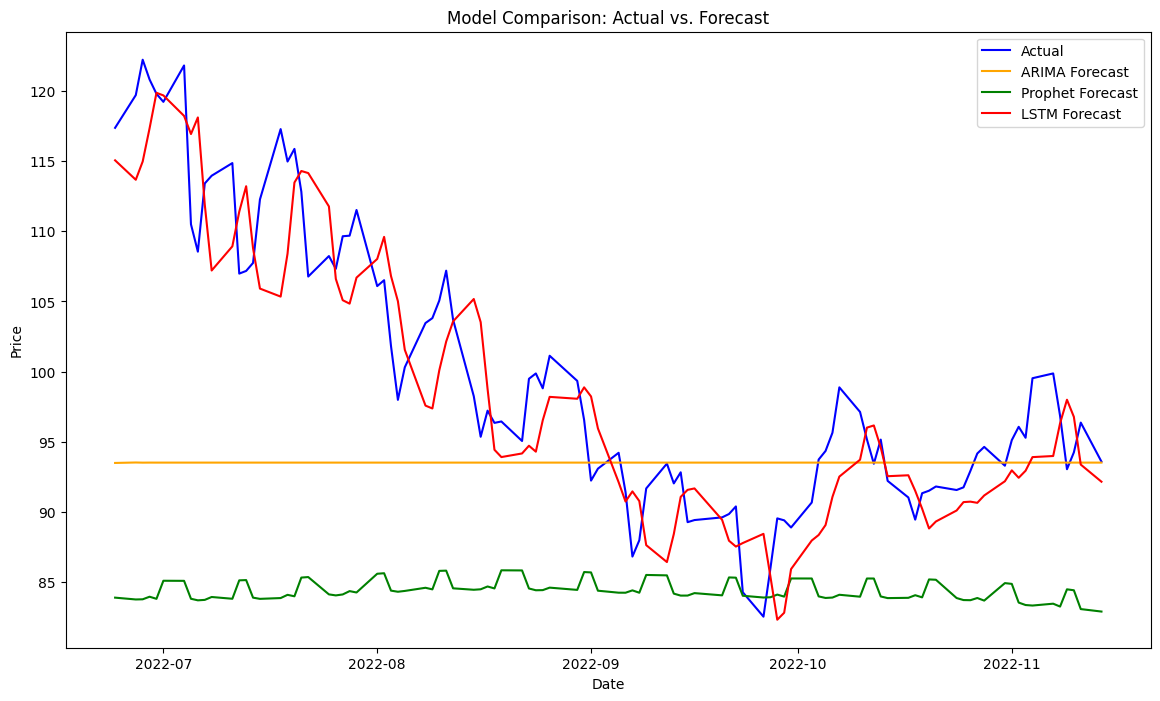

In [39]:
# Align prophet forecast to the length of test_last_period
prophet_forecast = prophet_forecast[-forecast_steps:]
arima_forecast = arima_forecast[-forecast_steps:]
lstm_forecast = lstm_forecast[-forecast_steps:]
test_last_period = test[-forecast_steps:]
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(test_last_period.index, test_last_period, label="Actual", color="blue")
plt.plot(test_last_period.index, arima_forecast, label="ARIMA Forecast", color="orange")
plt.plot(test_last_period.index, prophet_forecast, label="Prophet Forecast", color="green")
plt.plot(test_last_period.index, lstm_forecast, label="LSTM Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Model Comparison: Actual vs. Forecast")
plt.legend()
plt.show()


## Exploring Additional Statistical and Econometric Models

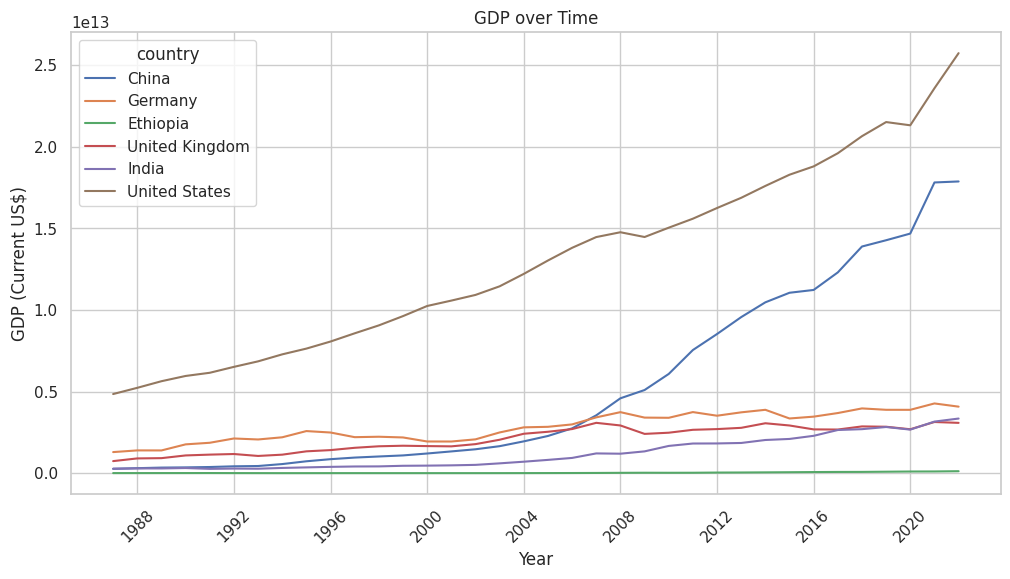

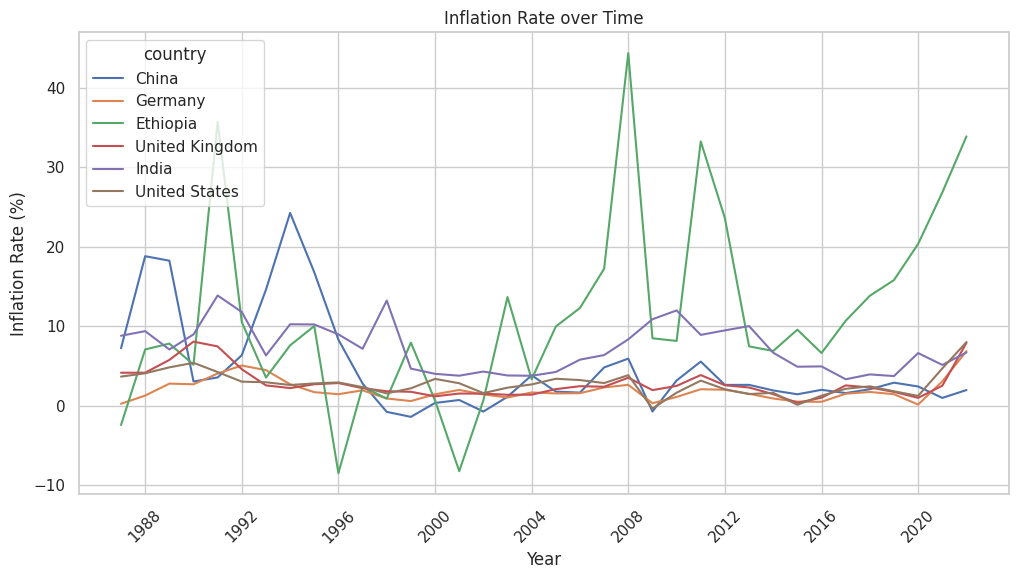

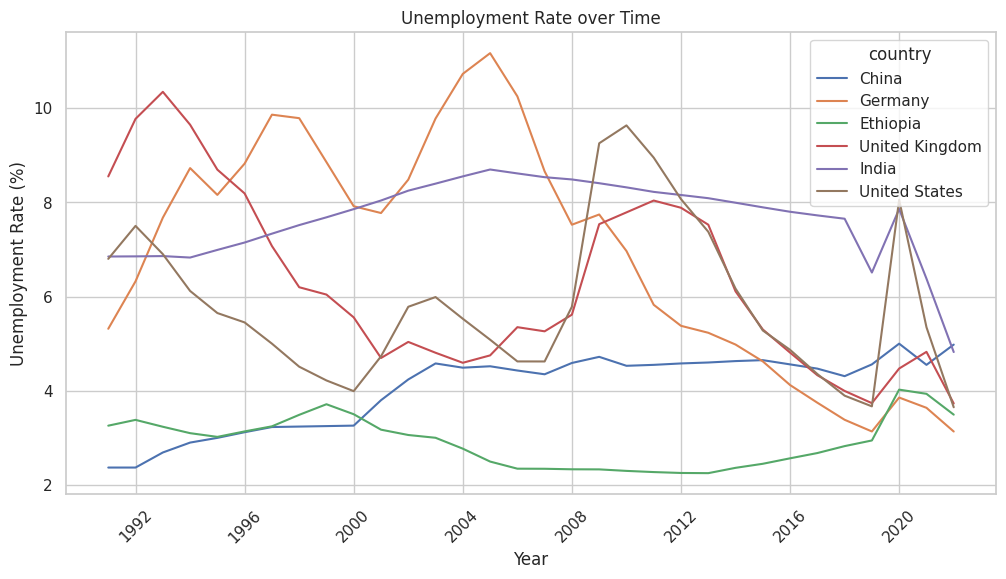

In [40]:
import wbdata
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Set date range and country list
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
countries = ['USA', 'GBR', 'ETH', 'IND', 'CHN', 'DEU']

# Define indicators for GDP, inflation, and unemployment rate
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',                   # GDP (current US$)
    'FP.CPI.TOTL.ZG': 'Inflation',             # Inflation, consumer prices (annual %)
    'SL.UEM.TOTL.ZS': 'Unemployment'           # Unemployment (% of total labor force)
}

# Fetch the data from World Bank
data = wbdata.get_dataframe(indicators, country=countries)

# Reset index and prepare data
data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'])

# Format the values for better readability in output
pd.options.display.float_format = '{:,.2f}'.format

# Filter data to only include dates within the specified range
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Plotting GDP, inflation, and unemployment for each country over time using Seaborn
sns.set(style="whitegrid")

# Plot GDP over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='GDP', hue='country')
plt.title('GDP over Time')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.xticks(rotation=45)
plt.show()

# Plot Inflation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='Inflation', hue='country')
plt.title('Inflation Rate over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot Unemployment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='Unemployment', hue='country')
plt.title('Unemployment Rate over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()



In [41]:
filtered_data.head()
filtered_data.rename(columns={'date': 'Date'}, inplace=True)


In [42]:
merged_price_factors = price_data.merge(filtered_data, on='Date', how='left').fillna(0)


In [43]:
merged_price_factors['Date'] = pd.to_datetime(merged_price_factors['Date'])


In [44]:
merged_price_factors.head()


,Date,Price,country,GDP,Inflation,Unemployment
0,1987-05-20,18.63,0,0.00,0.00,0.00
1,1987-05-21,18.45,0,0.00,0.00,0.00
2,1987-05-22,18.55,0,0.00,0.00,0.00
3,1987-05-25,18.60,0,0.00,0.00,0.00
4,1987-05-26,18.63,0,0.00,0.00,0.00


In [45]:
from statsmodels.tsa.api import VAR

# Multivariate dataset with additional factors
data_multivar = merged_price_factors[['Price', 'GDP', 'Inflation','Unemployment']]
model = VAR(data_multivar)
var_result = model.fit()
print(var_result.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Nov, 2024
Time:                     18:45:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    43.1869
Nobs:                     9015.00    HQIC:                   43.1765
Log likelihood:          -245741.    FPE:                5.61050e+18
AIC:                      43.1712    Det(Omega_mle):     5.59807e+18
--------------------------------------------------------------------
Results for equation Price
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.038630         0.022813            1.693           0.090
L1.Price                0.999376         0.000390         2563.228           0.000
L1.GDP                 -0.000000         0.000000   

### Summary of a Vector Autoregression (VAR) model

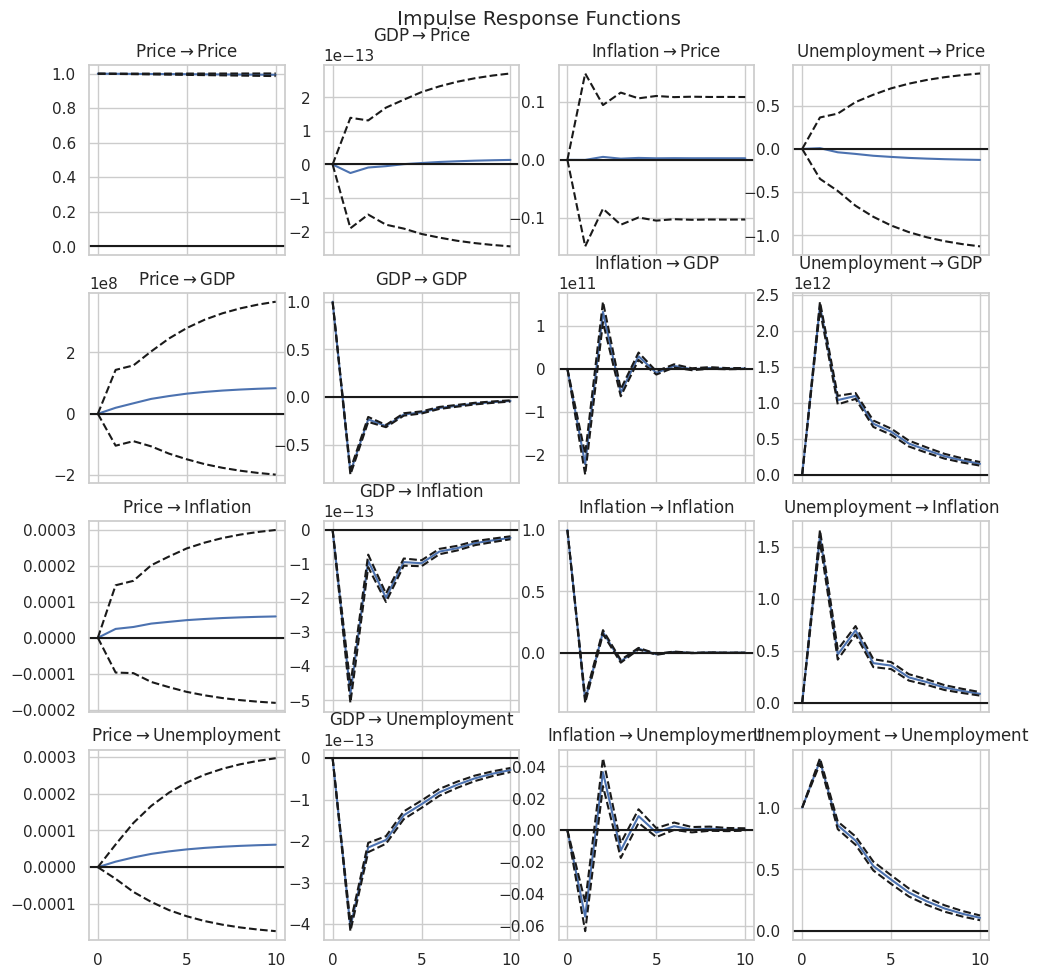

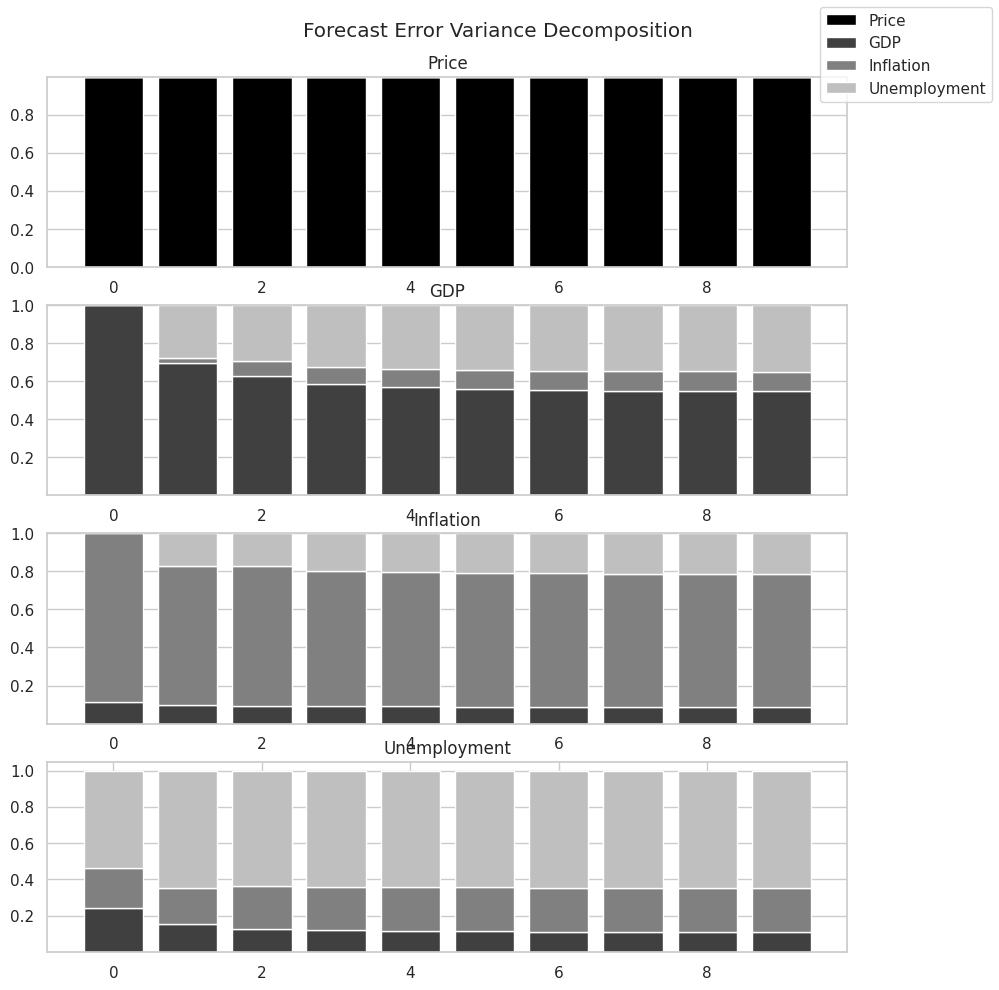

,AIC,BIC,FPE,HQIC
0,51.41,51.42,2.130e+22,51.41
1,43.18,43.19,5.645e+18,43.18
2,27.19,27.22,6.439e+11,27.20
3,9.515,9.556,1.356e+04,9.529
4,12.46,12.51,2.573e+05,12.48
5,6.260,6.326,523.3,6.283
6,5.111*,5.190*,165.9*,5.138*
7,6.597,6.689,733.2,6.629
8,7.174,7.278,1305.,7.209
9,8.449,8.566,4669.,8.488


In [46]:
import matplotlib.pyplot as plt

# 1. Impulse Response Function (IRF) Plot
irf = var_result.irf(10) 
irf.plot(orth=False)
plt.suptitle("Impulse Response Functions")
plt.show()

# 2. Forecast Error Variance Decomposition (FEVD) Plot
fevd = var_result.fevd(10)
fevd.plot()
plt.suptitle("Forecast Error Variance Decomposition")
plt.show()

# 3. Lag Order Selection Criteria
# This helps to see how different lag orders compare using criteria like AIC, BIC, HQIC
model.select_order(15).summary()
